In [1]:
# import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as sk_preprocessing
import sklearn.model_selection as sk_modelselect

In [2]:
# load dataset
dataset = pd.DataFrame(pd.read_csv("../data/dataset_1.csv", header=0))
display(dataset.head(10))

print(dataset.shape)

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.410
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.690
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.860
3,26.3,3,-,10.318,8540,53.6,136.0,130,7990,4170.780
4,26.4,2,-,10.316,9560,53.7,136.0,130,8915,4653.630
5,26.5,3,-,10.315,9490,53.8,140.0,130,8880,4635.360
6,26.6,3,1,10.313,9780,54.0,140.0,130,9180,4791.960
7,27.0,2,2,10.317,10450,54.1,140.0,130,9826,6317.135
8,27.1,2,2,10.329,10800,54.3,144.0,130,10110,6499.719
9,27.2,5,2,10.342,10860,54.5,144.0,130,10170,6538.293


(302, 10)


In [3]:
# check for missing data
print(dataset.isna().sum())

Age                   0
Mortality female      0
Mortality male        0
sex ratio             0
Total Eggs            0
Egg Weight            0
Feed female           0
Feed male             0
Hatching Eggs         0
total hatched eggs    0
dtype: int64


In [4]:
# Get columns with object or categorical dtype
categorical_cols = dataset.columns[(dataset.dtypes==object) | (dataset.dtypes==bool)].tolist()
print(categorical_cols)

['Mortality female', 'Mortality male']


In [5]:
# Loop through each categorical column and print what are the categoris they have (only done for test dataset)
for col in categorical_cols:
    categories = dataset[col].unique()
    print(f"{col}: {categories}")

Mortality female: ['5' '2' '3' '4' '6' '58' '67' '32' '8' '11' '17' '12' '10' '.' '7']
Mortality male: ['2' '1' '-' '75' '3' '4' '0']


In [6]:
dataset.replace('-', 0, inplace=True)
dataset.replace('.', 0, inplace=True)
display(dataset.head())

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs,total hatched eggs
0,26.0,5,2,10.290,6850,53.2,133.0,130,6405,3343.41
1,26.1,2,2,10.300,7630,53.4,133.0,130,7145,3729.69
2,26.2,2,1,10.312,8130,53.5,136.0,130,7630,3982.86
3,26.3,3,0,10.318,8540,53.6,136.0,130,7990,4170.78
4,26.4,2,0,10.316,9560,53.7,136.0,130,8915,4653.63


In [7]:
dataset['Mortality male'] = dataset['Mortality male'].astype(int)
dataset['Mortality female'] = dataset['Mortality female'].astype(int)

dataset.dtypes

Age                   float64
Mortality female        int32
Mortality male          int32
sex ratio             float64
Total Eggs              int64
Egg Weight            float64
Feed female           float64
Feed male               int64
Hatching Eggs           int64
total hatched eggs    float64
dtype: object

In [8]:
x_data = dataset.drop('total hatched eggs', axis=1)
y_data = dataset['total hatched eggs']

# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = sk_modelselect.train_test_split(x_data, y_data, test_size=0.10, random_state=42)

display(X_train.head());
display(y_train.head());

,Age,Mortality female,Mortality male,sex ratio,Total Eggs,Egg Weight,Feed female,Feed male,Hatching Eggs
283,66.3,4,0,11.726,7040,69.8,152.0,130,6450
198,54.2,3,1,11.022,9660,67.7,158.0,130,9150
42,32.0,4,2,10.334,13280,58.4,168.0,130,12550
17,28.3,4,0,10.371,12850,55.8,153.5,130,12000
168,50.0,2,0,10.884,10490,67.0,158.0,130,10000


283     5289.000
198     7704.300
42     10929.569
17      8946.000
168     8440.000
Name: total hatched eggs, dtype: float64

In [9]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],) ))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_absolute_error')

In [10]:
hist = model.fit(X_train, y_train,batch_size=50, epochs=300, verbose=1)

Epoch 1/300
6/6 [==============================] - 1s 5ms/step - loss: 6650.4917
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 5467.5186
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 4268.9175
Epoch 4/300
6/6 [==============================] - 0s 3ms/step - loss: 3030.7759
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 1879.9497
Epoch 6/300
6/6 [==============================] - 0s 3ms/step - loss: 856.6635
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 622.2820
Epoch 8/300
6/6 [==============================] - 0s 3ms/step - loss: 658.1045
Epoch 9/300
6/6 [==============================] - 0s 4ms/step - loss: 507.8839
Epoch 10/300
6/6 [==============================] - 0s 3ms/step - loss: 556.5897
Epoch 11/300
6/6 [==============================] - 0s 3ms/step - loss: 510.3368
Epoch 12/300
6/6 [==============================] - 0s 3ms/step - loss: 511.0165
Epoch 13/300
6/6 [==============

1/1 [==============================] - 0s 64ms/step - loss: 344.9344
Test loss: 344.9343566894531


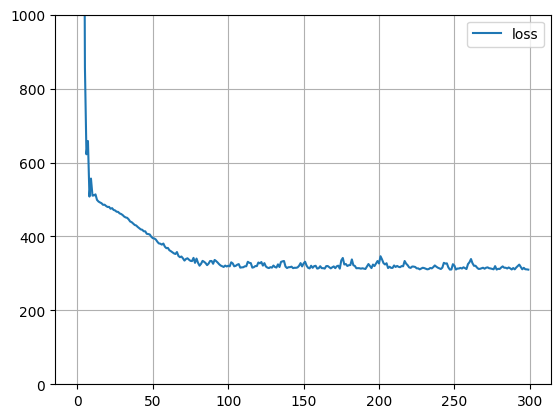

In [13]:
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

import matplotlib.pyplot as plt

# https://www.tensorflow.org/tutorials/keras/regression
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000])
  plt.legend()
  plt.grid(True)

plot_loss(hist)